In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '..')

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from fit_EM import check_convergence, plot_elbos

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

# set plot design features
font = {'family'   : 'sans-serif',
        #'sans-serif' : 'Helvetica',
        'weight'   : 'regular',
        'size'     : 24}

mpl.rc('font', **font)

colors = np.array([[95,59,151],[85,180,103],[250,186,63],[150,150,150]])/255

/usr/people/istone/.conda/envs/slds_natbhv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tol = 15
min_steps = 1
dataset = "datasetG_q1"

random_inits = np.load('../data/em-fits/%s/random.npz' %dataset)
print('random inits:')
random_elbos, random_steps = check_convergence(random_inits,tol=tol,method='ELBO',min_steps=min_steps, half_num_iters=False)

bern_init = np.load('../data/em-fits/%s/best-lds.npz' %dataset)
print('best-lds init:')
bern_elbos, bern_steps = check_convergence(bern_init,tol=tol,method='ELBO',min_steps=min_steps, half_num_iters=False)

gauss_init = np.load('../data/em-fits/%s/gaussian.npz' %dataset)
print('gaussian init:')
gauss_elbos, gauss_steps = check_convergence(gauss_init,tol=tol,method='ELBO',min_steps=min_steps, half_num_iters=False)

random inits:
initialization: 0, steps to convergence: 40.0, elbo diff: 45
initialization: 1, steps to convergence: 40.0, elbo diff: 46
initialization: 2, steps to convergence: 40.0, elbo diff: 23
initialization: 3, steps to convergence: 40.0, elbo diff: 28
initialization: 4, steps to convergence: 40.0, elbo diff: 17
initialization: 5, steps to convergence: 40.0, elbo diff: 24
initialization: 6, steps to convergence: 29.0, elbo diff: 10
initialization: 7, steps to convergence: 38.0, elbo diff: 6
initialization: 8, steps to convergence: 38.0, elbo diff: 12
initialization: 9, steps to convergence: 40.0, elbo diff: 46
initialization: 10, steps to convergence: 40.0, elbo diff: 69
initialization: 11, steps to convergence: 5.0, elbo diff: 58
initialization: 12, steps to convergence: 40.0, elbo diff: 28
initialization: 13, steps to convergence: 40.0, elbo diff: 49
initialization: 14, steps to convergence: 7.0, elbo diff: 23
initialization: 15, steps to convergence: 40.0, elbo diff: 68
initial

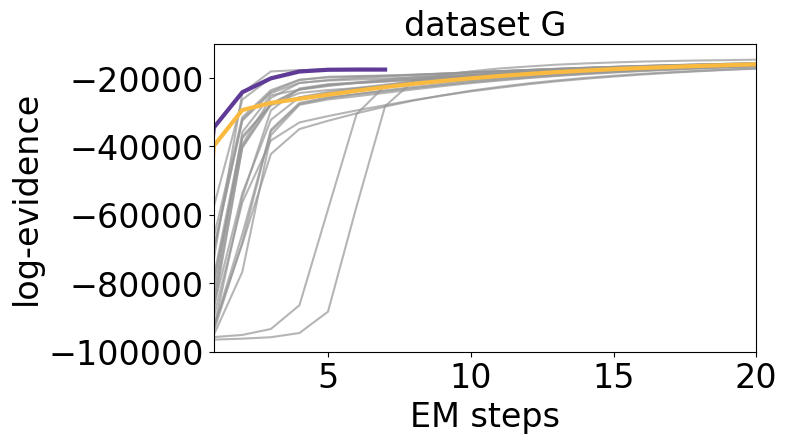

In [33]:
plt.figure(figsize=(7,4))

for i in range(20):
    if i == 0:
        plt.plot(random_elbos[i,0:int(random_steps[i])+1],color=colors[3], alpha=0.7, label='random')
    else:
        plt.plot(random_elbos[i,0:int(random_steps[i])+1],color=colors[3], alpha=0.7)
    
plt.plot(bern_elbos[0,0:int(bern_steps)+1],color=colors[0], label='best-LDS', linewidth=3)
plt.plot(gauss_elbos[0,0:int(gauss_steps)+1],color=colors[2], label='gaussian', linewidth=3)

plt.xlim([1,20])
plt.xticks(np.arange(5,21,5))
plt.ylim([-100000,-10000])
plt.yticks(np.arange(-100000,-10000,20000))
plt.xlabel('EM steps')
plt.ylabel('log-evidence')
plt.title('dataset G', fontsize=24)

plt.savefig("saved_images/fig3_datasetG_q1.pdf",transparent=True)

In [32]:
avg_time_per_iter = 76 # computed from time to run ssm code (in seconds), varies by dataset 
total_time = 0
for i in range(20):
    total_time += random_steps[i]*avg_time_per_iter

avg_time = total_time/20
    
print('Total time for random inits: %.2f minutes' %(total_time/60))
print('Average time for each random init: %.2f minutes' %(avg_time/60))

total_time_bern = bern_steps*avg_time_per_iter
print('Total time for bernoulli init: %.2f minutes' %(total_time_bern/60))

total_time_gauss = gauss_steps*avg_time_per_iter
print('Total time for gaussian init: %.2f minutes' %(total_time_gauss/60))

Total time for random inits: 886.67 minutes
Average time for each random init: 44.33 minutes
Total time for bernoulli init: 8.87 minutes
Total time for gaussian init: 49.40 minutes
